# Predicting movie opening weekends

## Scrape website tables for data

### We will use the data available at www.boxofficemojo.com 

Import the relevant packages

In [173]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Check the website allows us to access data

In [174]:
url = 'https://www.boxofficemojo.com/chart/top_opening_weekend/'
pages = requests.get(url)

Parse the html code to make it more readable to python

In [175]:
soup = BeautifulSoup(pages.text, 'lxml')

Save the main table on the page and save the column headers

In [176]:
table1 = soup.table

In [177]:
headers = []
for i in table1.find_all('th'):
 title = i.text
 headers.append(title.strip())

Create a dataframe to store tabular data

In [178]:
df = pd.DataFrame(columns = headers)

Create a for loop to capture data from all the rows

In [179]:
for j in table1.find_all('tr')[1:]:
 row_data = j.find_all('td')
 row = [i.text.strip() for i in row_data]
 length = len(df)
 df.loc[length] = row

In [180]:
df

,Rank,Release,Opening,Total Gross,% of Total,Theaters,Average,Date,Distributor
0,1,Avengers: Endgame,"$357,115,007","$858,373,000",41.6%,"4,662","$76,601","Apr 26, 2019",Walt Disney Studios Motion Pictures
1,2,Spider-Man: No Way Home,"$260,138,569","$724,886,280",35.9%,"4,336","$59,995","Dec 17, 2021",Sony Pictures Entertainment (SPE)
2,3,Avengers: Infinity War,"$257,698,183","$678,815,482",38%,"4,474","$57,599","Apr 27, 2018",Walt Disney Studios Motion Pictures
3,4,Star Wars: Episode VII - The Force Awakens,"$247,966,675","$936,662,225",26.5%,"4,134","$59,982","Dec 18, 2015",Walt Disney Studios Motion Pictures
4,5,Star Wars: Episode VIII - The Last Jedi,"$220,009,584","$620,181,382",35.5%,"4,232","$51,987","Dec 15, 2017",Walt Disney Studios Motion Pictures
...,...,...,...,...,...,...,...,...,...
195,196,War for the Planet of the Apes,"$56,262,929","$146,880,162",38.3%,"4,022","$13,988","Jul 14, 2017",Twentieth Century Fox
196,197,Valentine's Day,"$56,260,707","$110,485,654",50.9%,"3,665","$15,350","Feb 12, 2010",Warner Bros.
197,198,Ralph Breaks the Internet,"$56,237,634","$201,091,711",28%,"4,017","$13,999","Nov 21, 2018",Walt Disney Studios Motion Pictures
198,199,Snow White and the Huntsman,"$56,217,700","$155,332,381",36.2%,"3,773","$14,900","Jun 1, 2012",Universal Pictures


### Add data from all other pages

If we look at the BoxOfficeMojo website, there are 1000 films in total. We only have 200 so far in our dataframe. Inspecting the website urls indicates that each page has data for 200 films and the url itself incrementally increases by 'https://www.boxofficemojo.com/chart/top_opening_weekend/?offset=200n', where n iterates from 1 to 4.

In [181]:
for n in range(1,5):
    url = 'https://www.boxofficemojo.com/chart/top_opening_weekend/?offset={}'.format(200*n)
    pages = requests.get(url)
    soup = BeautifulSoup(pages.text, 'lxml')
    table1 = soup.table
    for j in table1.find_all('tr')[1:]:
        row_data = j.find_all('td')
        row = [i.text.strip() for i in row_data]
        length = len(df)
        df.loc[length] = row

## Visualise the data

Let's start by visualising some of the data using plots. Initially, we change the type of certain columns from strings to ints or floats. Convert price column from string to int, removing commas and dollars.

In [182]:
cols = ['Opening','Total Gross','Average']
df[cols] = df[cols].replace({'\$': '', ',': ''}, regex=True)
df[cols] = df[cols].astype(int)
df['% of Total'] = df['% of Total'].str.rstrip('%').astype(float)
df['Date'] = pd.to_datetime(df['Date'])
df

,Rank,Release,Opening,Total Gross,% of Total,Theaters,Average,Date,Distributor
0,1,Avengers: Endgame,357115007,858373000,41.6,"4,662",76601,2019-04-26,Walt Disney Studios Motion Pictures
1,2,Spider-Man: No Way Home,260138569,724886280,35.9,"4,336",59995,2021-12-17,Sony Pictures Entertainment (SPE)
2,3,Avengers: Infinity War,257698183,678815482,38.0,"4,474",57599,2018-04-27,Walt Disney Studios Motion Pictures
3,4,Star Wars: Episode VII - The Force Awakens,247966675,936662225,26.5,"4,134",59982,2015-12-18,Walt Disney Studios Motion Pictures
4,5,Star Wars: Episode VIII - The Last Jedi,220009584,620181382,35.5,"4,232",51987,2017-12-15,Walt Disney Studios Motion Pictures
...,...,...,...,...,...,...,...,...,...
995,996,We Were Soldiers,20212543,78122718,25.9,"3,143",6430,2002-03-01,Paramount Pictures
996,997,Eight Below,20188176,81612565,24.7,"3,066",6584,2006-02-17,Walt Disney Studios Motion Pictures
997,998,Rambo: First Blood Part II,20176217,150415432,13.4,"2,074",9728,1985-05-22,TriStar Pictures
998,999,What Happens in Vegas,20172474,80277646,25.1,"3,215",6274,2008-05-09,Twentieth Century Fox


<AxesSubplot:ylabel='Frequency'>

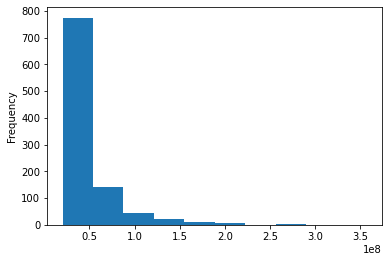

In [186]:
df['Opening'].plot.hist()

From the above histogram, it is clear that most films make less than $50,000,000 during opening weekend.

<AxesSubplot:title={'center':'Movie opening by distributor'}, xlabel='Distributor', ylabel='Opening'>

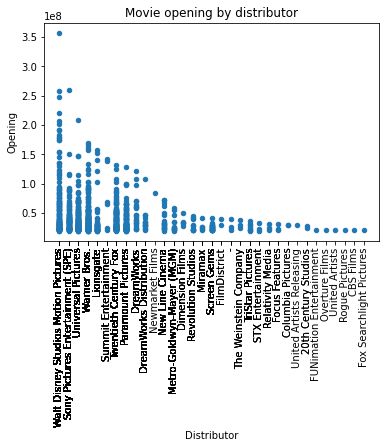

In [209]:
df.plot.scatter(x='Distributor', y='Opening', title='Movie opening by distributor', xticks=df.Distributor, rot=90)

The above plot shows the variation in opening weekend takings by distributor

<AxesSubplot:title={'center':'Total takings by opening weekend'}, xlabel='Opening', ylabel='Total Gross'>

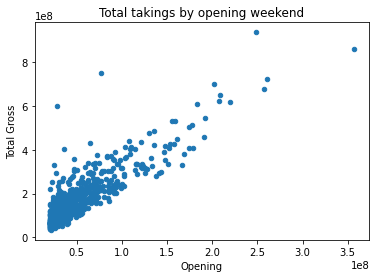

In [211]:
df.plot.scatter(x='Opening', y='Total Gross', title='Total takings by opening weekend')

Out of interest, check the relationship the opening weekend takings has on the total gross figure.

<AxesSubplot:title={'center':'Opening weekend by year'}, xlabel='Year', ylabel='Opening'>

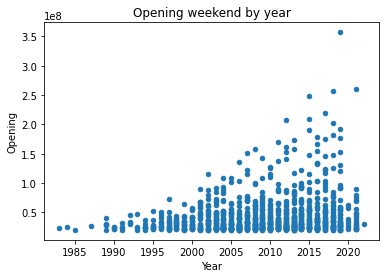

In [216]:
df['Year'] = df['Date'].dt.year
df.plot.scatter(x='Year', y='Opening', title='Opening weekend by year')

From this scatter plot it is evident that over the years, there has been a general trend upwards in opening weekend takings.

<AxesSubplot:title={'center':'Opening weekend by date of release'}, xlabel='Month', ylabel='Opening'>

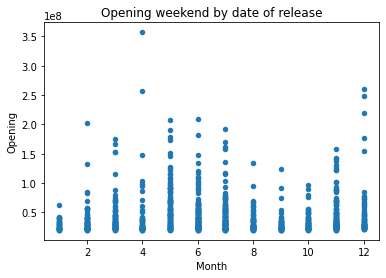

In [215]:
df['Month'] = df['Date'].dt.month
df.plot.scatter(x='Month', y='Opening', title='Opening weekend by date of release')

Based on the chart above, it appears as though opening weekend takings are highest in April and Dec (Easter and Xmas!)

## Forming a hypothesis

Based on the visualisations and initial data checks above, the hypothesis that I'd make is that the opening weekend takings depends on: 

* the month of release; 
* year of release; 
* and the distributor. 

We will build a ML model to predict the opening weekend takings based on these 'features.'

## Building a ML model

In [223]:
X = df[['Year','Month','Distributor']]
X

,Year,Month,Distributor
0,2019,4,Walt Disney Studios Motion Pictures
1,2021,12,Sony Pictures Entertainment (SPE)
2,2018,4,Walt Disney Studios Motion Pictures
3,2015,12,Walt Disney Studios Motion Pictures
4,2017,12,Walt Disney Studios Motion Pictures
...,...,...,...
995,2002,3,Paramount Pictures
996,2006,2,Walt Disney Studios Motion Pictures
997,1985,5,TriStar Pictures
998,2008,5,Twentieth Century Fox


In [224]:
y = df[['Opening']]
y

,Opening
0,357115007
1,260138569
2,257698183
3,247966675
4,220009584
...,...
995,20212543
996,20188176
997,20176217
998,20172474
